/tmp/ipykernel_7727/1043644665.py:56: RuntimeWarning: invalid value encountered in log10
  levels = np.log10(np.geomspace(xi.min()-1e-3,xi.max()+1e-3,20))


ValueError: Axis limits cannot be NaN or Inf

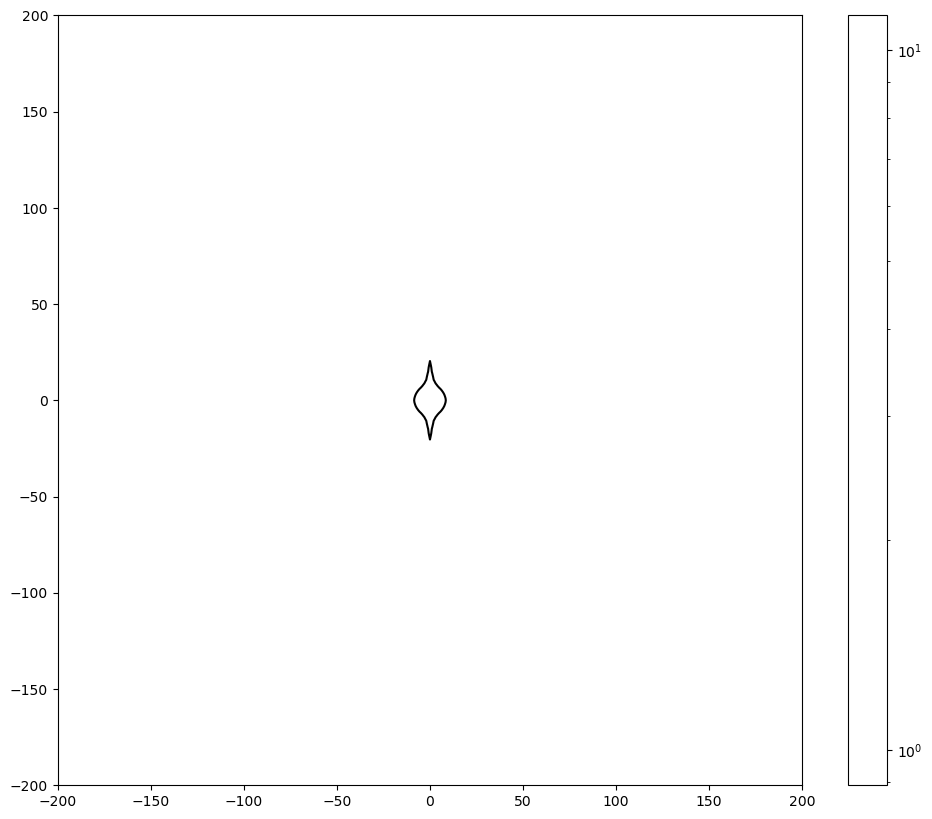

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

nbins     = np.int32(200)
rmin_perp = np.float64(0.0)
rmax_perp = np.float64(200.0)
rmin_pll  = np.float64(0.0)
rmax_pll  = np.float64(200.0)
ngald     = 401359
ngalr     = 4483837

pairs_DD = np.loadtxt('../data/pairs_DD_rpmin_%.1f_rpmax_%.1f_pimin_%.1f_pmax_%.1f_nbins_%d_ndata_%d_ndata_%d.out' \
           % (rmin_perp, rmax_perp, rmin_pll, rmax_pll, nbins, ngald, ngald))
pairs_RR = np.loadtxt('../data/pairs_RR_rpmin_%.1f_rpmax_%.1f_pimin_%.1f_pmax_%.1f_nbins_%d_nrand_%d_nrand_%d.out' \
           % (rmin_perp, rmax_perp, rmin_pll, rmax_pll, nbins, ngalr, ngalr))
pairs_DR = np.loadtxt('../data/pairs_DR_rpmin_%.1f_rpmax_%.1f_pimin_%.1f_pmax_%.1f_nbins_%d_ndata_%d_nrand_%d.out' \
           % (rmin_perp, rmax_perp, rmin_pll, rmax_pll, nbins, ngald, ngalr))

pairs_DD[0] -= ngald
pairs_RR[0] -= ngalr
pairs_DD = pairs_DD.reshape((nbins,nbins))
pairs_RR = pairs_RR.reshape((nbins,nbins))
pairs_DR = pairs_DR.reshape((nbins,nbins))
# skip     = 20
# pairs_DD[:skip,:]  = np.nan
# pairs_RR[:skip,:]  = np.nan
# pairs_DD[:,:skip] = np.nan
# pairs_RR[:,:skip] = np.nan
pairs_DD = pairs_DD.T/(ngald*(ngald-1)/2)
pairs_RR = pairs_RR.T/(ngalr*(ngalr-1)/2)
pairs_DR = pairs_DR.T/(ngald*ngalr)

#xi = (pairs_DD)/(pairs_RR) - 1 #DP
xi = (pairs_DD-2*pairs_DR+pairs_RR)/(pairs_RR) #LS
#xi = (pairs_DD)/pairs_DR - 1


x = np.linspace(rmin_perp, rmax_perp, nbins)
y = np.linspace(rmin_perp, rmax_pll, nbins)
X, Y = np.meshgrid(np.concatenate((-x[::-1],x)), np.concatenate((-y[::-1],y)))

C = np.zeros((2*nbins, 2*nbins))
C[:nbins, :nbins] = np.flipud(np.fliplr(xi))
C[:nbins, nbins:] = np.flipud(xi)
C[nbins:, :nbins] = np.fliplr(xi)
C[nbins:, nbins:] = xi

#X, Y = np.meshgrid(x,y)
#plt.imshow(xi, interpolation='nearest', origin='lower', cmap=plt.cm.Purples, extent=[rmin_perp, rmax_perp, rmin_pll, rmax_pll])
#contours = plt.contour(X, Y, xi, 10, colors='black')

#levels = np.geomspace(1e-3,18,10)
#levels = np.log10([0.0, 0.01, 0.03, 0.08, 0.19, 0.46, 1.14, 2.81, 6.93, 17.12])
#levels[0]=-3.05
levels = np.log10(np.geomspace(xi.min()-1e-3,xi.max()+1e-3,20))
#levels = 10
#print(levels)
#plt.imshow(C, interpolation='nearest', cmap=plt.cm.Purples, origin='lower', extent=[-rmax_perp, rmax_perp, -rmax_pll, rmax_pll])

plt.figure(figsize=(12,10))
#cs = plt.contourf(X, Y, C, levels)
cs = plt.contourf(X, Y, np.ma.masked_where(C <= 0, C), 10**levels,norm=mpl.colors.LogNorm())#, locator=mpl.ticker.LogLocator())


contours = plt.contour(X, Y, C, levels, colors='black')
#plt.clabel(contours, contours.levels, fontsize=8)
plt.colorbar(cs)
plt.show()


In [18]:
levels

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 1.14214824])